In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


In [0]:
X = datasets.load_iris().data[:100]

y = datasets.load_iris().target[:100]


In [0]:
scaler = MinMaxScaler()
#X = scaler.fit_transform(X)


In [0]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

def derSigmoide(y):
    return y * (1 - y)

def entrenamiento(Xj,Yj,W0,W1,W2):
  """Xj es un arreglo con 1 o mas casos """
  YY0, YY1, YYout = evalua(Xj, W0,W1,W2)
  errorOut = Yj - YYout
  """ d" en la capa de salida """
  dW2 = errorOut * derSigmoide(YYout)
  error1 = dW2.dot(W2.T)
  """ dW en la 2a capa oculta"""
  dW1 = error1 * derSigmoide(YY1)
  error0 = dW1.dot(W1.T)
  dW0 = error0 * derSigmoide(YY0)

  """ Calculando los ajustes """
  incW0 = Xj.T.dot(dW0)
  incW1 = YY0.T.dot(dW1)
  incW2 = YY1.T.dot(dW2)
  
  return incW0,incW1,incW2

def evalua(x,W0,W1,W2):
  Y0 = sigmoide(x.dot(W0))
  Y1 = sigmoide(Y0.dot(W1))
  Y2 = sigmoide(Y1.dot(W2))
  return Y0,Y1,Y2

#Apartado b

In [5]:
np.random.seed(100)

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X, y = unison_shuffled_copies(X,y)



print(X[:100:10])
print(y[:100:10])


[[4.9 3.6 1.4 0.1]
 [6.  3.4 4.5 1.6]
 [4.7 3.2 1.6 0.2]
 [5.2 4.1 1.5 0.1]
 [6.6 3.  4.4 1.4]
 [5.7 3.8 1.7 0.3]
 [6.3 3.3 4.7 1.6]
 [4.6 3.2 1.4 0.2]
 [5.2 3.5 1.5 0.2]
 [5.6 3.  4.5 1.5]]
[0 1 0 0 1 0 1 0 0 1]


In [6]:
weight_0 = np.random.random((4,3)) - 0.5
weight_1 = np.random.random((3,2)) - 0.5
weight_2 = np.random.random((2,1)) - 0.5

for i in range(100):
    inc_weight_0, inc_weight_1, inc_weight_2 = entrenamiento(X[i].reshape((1,4)), y[i], weight_0, weight_1, weight_2)
    print(f'Elemento {i}\n\nincremento 0: {inc_weight_0}\n\nincremento 1: {inc_weight_1}\n\nincremento 2: {inc_weight_2}\n')

    weight_0 += inc_weight_0
    weight_1 += inc_weight_1
    weight_2 += inc_weight_2

print(f'peso 0: {weight_0}\n\npeso 1: {weight_1}\n\npeso 2: {weight_2}\n\n')

Elemento 0

incremento 0: [[2.42441497e-04 2.96050332e-03 1.45947520e-03]
 [1.78120284e-04 2.17506366e-03 1.07226750e-03]
 [6.92689992e-05 8.45858092e-04 4.16992915e-04]
 [4.94778565e-06 6.04184351e-05 2.97852082e-05]]

incremento 1: [[0.0079471  0.00754273]
 [0.00670111 0.00636014]
 [0.00329477 0.00312712]]

incremento 2: [[-0.05932614]
 [-0.05071138]]

Elemento 1

incremento 0: [[-3.42750903e-04 -5.84905164e-03 -3.24798038e-03]
 [-1.25675331e-04 -2.14465227e-03 -1.19092614e-03]
 [-2.28500602e-04 -3.89936776e-03 -2.16532025e-03]
 [-5.71251505e-05 -9.74841941e-04 -5.41330063e-04]]

incremento 1: [[-0.01421739 -0.01329564]
 [-0.01211667 -0.01133112]
 [-0.00802677 -0.00750638]]

incremento 2: [[0.08881902]
 [0.07905186]]

Elemento 2

incremento 0: [[2.21131556e-04 2.63751448e-03 1.29221507e-03]
 [1.50369458e-04 1.79350985e-03 8.78706251e-04]
 [7.07620981e-05 8.44004635e-04 4.13508824e-04]
 [1.76905245e-05 2.11001159e-04 1.03377206e-04]]

incremento 1: [[0.00749133 0.00706786]
 [0.0064409

#Apartado c

In [7]:
_, _, results = evalua(X, weight_0, weight_1, weight_2)

temp = (results.reshape(100) >= 0.5)*1
print( sum(temp == y)/100)


0.5


In [45]:
#np.random.seed(np.random.randint(0,100))

weight_0 = np.random.random((4,10)) - 0.5
weight_1 = np.random.random((10,5)) - 0.5
weight_2 = np.random.random((5,1)) - 0.5

results = []
lr = 0.5
for _ in range(500):

    i = np.random.randint(0,100)
    inc_weight_0, inc_weight_1, inc_weight_2 = entrenamiento(X[i].reshape((1,4)), y[i], weight_0, weight_1, weight_2)
    
    weight_0 =  weight_0 + inc_weight_0*lr
    weight_1 =  weight_1 + inc_weight_1*lr
    weight_2 =  weight_2 + inc_weight_2*lr

    _, _, values = evalua(X, weight_0, weight_1, weight_2)

    temp = (values.reshape(100) >= 0.5)*1
    results.append( np.sum(temp == y)*1/100.0)


print(results[:500:25])

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.54, 0.5, 0.5, 0.5, 1.0, 0.7, 1.0, 1.0]


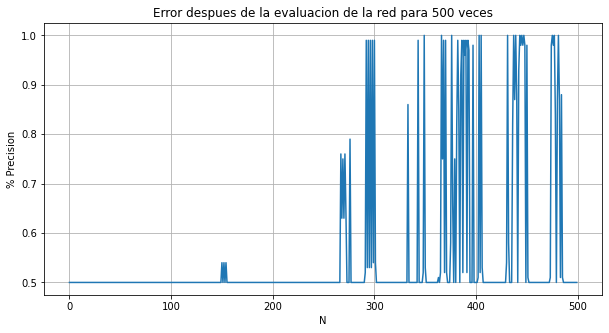

In [38]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(np.arange(500), results)
plt.title("Error despues de la evaluacion de la red para 500 veces")
plt.xlabel("N")
plt.ylabel("% Precision")
plt.grid()

#seccion one-hot encoder


In [0]:

X_ = datasets.load_iris().data

y_ = datasets.load_iris().target
